In [1]:
import pandas as pd  
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


### Loading Datasets

In [2]:
data1 = pd.read_csv(r'C:\Users\Asus\Desktop\Courses\Codes\Datasets\Cab_Data.csv') # Cab_Data 
data2 = pd.read_csv(r'C:\Users\Asus\Desktop\Courses\Codes\Datasets\Customer_ID.csv')  # Customer_ID
data3 = pd.read_csv(r'C:\Users\Asus\Desktop\Courses\Codes\Datasets\Transaction_ID.csv') # Transaction_ID
data4 = pd.read_csv(r'C:\Users\Asus\Desktop\Courses\Codes\Datasets\City.csv') # City

Data Check 

Result: `data2` and `data3` are not equal.

In [3]:
for i in [data1,data2,data3,data4]:
    print(len(i)) 

359392
49171
440098
20


### Merging Datasets

Net Balances 

In [4]:
data1['Net Balances'] = data1['Price Charged'] - data1['Cost of Trip']
data1.head()  

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Net Balances
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844


In [5]:
Big_Data = pd.merge(data1, data3, on ='Transaction ID' ) 
Big_Data = pd.merge(Big_Data, data2, on ='Customer ID' ) 

print('Length Data 1:',len(data1),'\nLength Data 2:',len(data2),'\nLength Data 3:',len(data3),'\nLength Data 4:',len(data4), '\nLength of Big Data:', len(Big_Data))  
Big_Data = Big_Data.iloc[:,1:]
Big_Data = pd.concat( ( Big_Data.iloc[:,:7], Big_Data.iloc[:,9:] ), axis=1 )  
Big_Data.head() 


Length Data 1: 359392 
Length Data 2: 49171 
Length Data 3: 440098 
Length Data 4: 20 
Length of Big Data: 359392


,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Net Balances,Gender,Age,Income (USD/Month)
0,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,Male,28,10813
1,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,281.2772,Male,28,10813
2,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,194.6480,Male,28,10813
3,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,Male,27,9237
4,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,253.9808,Male,27,9237


In [6]:
temp = list(Big_Data.columns) 
temp[-3] = 'Sex' 
Big_Data.columns = temp 

NaN Values 

There was no NaN Values

In [7]:
NaN_Report =[] 
for i in range(0, len(Big_Data.columns)):
    NaN_Report.append( sum(Big_Data.iloc[:,i].isnull()) ) 
NaN_Report  

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Number Of Company Cars

In [8]:
pink_cars = Big_Data[Big_Data['Company'] == 'Pink Cab'] 
yellow_cars = Big_Data[Big_Data['Company'] == 'Yellow Cab'] 

number_of_pinks = len ( pink_cars ) 
number_of_yellows = len( yellow_cars ) 
number_of_yellows_safe = len(Big_Data) - number_of_pinks 

lens = {'number_of_pinks':number_of_pinks, 'number_of_yellows':number_of_yellows, 'number_of_yellows_safe':number_of_yellows_safe} 
pd.DataFrame.from_dict(lens, orient='index', columns = ['Number of Instances']) 

,Number of Instances
number_of_pinks,84711
number_of_yellows,274681
number_of_yellows_safe,274681


Profit Per Car

,Overall Profits
Pink Company,62.652174
Yellow Company,160.259986


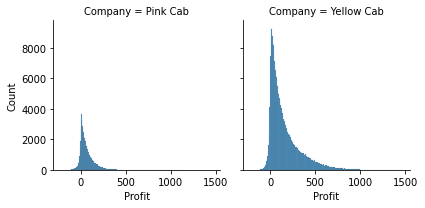

In [9]:
Pink_Balance = sum(pink_cars['Net Balances']) / number_of_pinks
Yellow_Balance = sum(yellow_cars['Net Balances']) /number_of_yellows 

Profits = [Pink_Balance, Yellow_Balance] 
PPC = pd.DataFrame(Profits, columns = ['Overall Profits'], index =['Pink Company','Yellow Company'])

Big_Data['Profit'] = Big_Data['Price Charged'] - Big_Data['Cost of Trip']

g = sns.FacetGrid(Big_Data, col="Company")
g.map(sns.histplot, Big_Data.columns[-1]) 

PPC 

Cities

In [10]:
pink_data = list() 
yellow_data= list() 
for i in pd.unique(Big_Data['City']): 
    pink_data.append( Big_Data[ (Big_Data['City'] == i ) &  (Big_Data['Company']== 'Pink Cab') ]  )
for i in pd.unique(Big_Data['City']): 
    yellow_data.append( Big_Data[ (Big_Data['City'] == i ) &  (Big_Data['Company']== 'Yellow Cab') ]  )

In [11]:
def Create_Cities(Colored_Data):
    cities =[] 
    imp_values = [] 
    for i in range( 0,len( pd.unique(Big_Data['City']) )):
        cities.append( str(pd.unique(Big_Data['City'])[i]) )
        imp_values.append( [ 
        sum ( Colored_Data[i]['KM Travelled'] ) / len(Colored_Data[i]['KM Travelled']) ,  
        sum ( Colored_Data[i]['Price Charged'] ) / len(Colored_Data[i]['Price Charged']) ,  
        sum ( Colored_Data[i]['Cost of Trip'] ) / len(Colored_Data[i]['Cost of Trip']) ,
        sum ( Colored_Data[i]['Net Balances'] ) / len(Colored_Data[i]['Net Balances']) ] )
        carname = ''.join(pd.unique(Colored_Data[i]['Company'])).split()[0] +' ' 
    return pd.DataFrame(imp_values, columns=[ carname+ 'KM Travelled', carname + 'Price Charged',carname + 'Cost of Trip', 'Net Balances'], index=cities)  
PD = Create_Cities(pink_data).sort_values(by='Net Balances', ascending= False) 
YD = Create_Cities(yellow_data).sort_values(by='Net Balances', ascending= False) 

In [12]:
# Subset Differences
Diff =  YD['Net Balances'] - PD['Net Balances'] 
Diff = pd.DataFrame(Diff)
Diff = Diff.rename(columns={"Net Balances": 'Differences'}) 


Using KMs will not be helpful as p is so higher than 0.05 which means it is insignificant to include in Profit value

In [13]:
stats.ttest_ind(YD['Yellow KM Travelled'], PD['Pink KM Travelled']) 

Ttest_indResult(statistic=1.5797685864877635, pvalue=0.12290743516191628)

In [14]:
# Subsetted `Differences`` & Combine Them
Nets = pd.concat( [PD,YD] ,axis=1 ).iloc[:,[3,7]]  

In [15]:
net_sum_row = [ sum( Nets.iloc[:,0] ) , sum( Nets.iloc[:,1] ),sum(Diff.iloc[:,0])  ] # Adding also the `Diff`
net_sum_row = pd.DataFrame(net_sum_row).T 

net_sum_row = net_sum_row.rename(columns= {0:'Net Balances',1:'Net Balances', 2:'Differences'})   

In [16]:
Nets = pd.concat( [Nets, Diff], axis=1 )

PDC = pd.concat( [ Nets, net_sum_row], axis=0 ).rename(index={0:'Sum'})  

In [17]:
PDC.columns = ['Pink Profit','Yellow Profit','Differences']  
PDC['City'] = PDC.index

Text(0.5, 0.98, 'Cities Vs Profit')

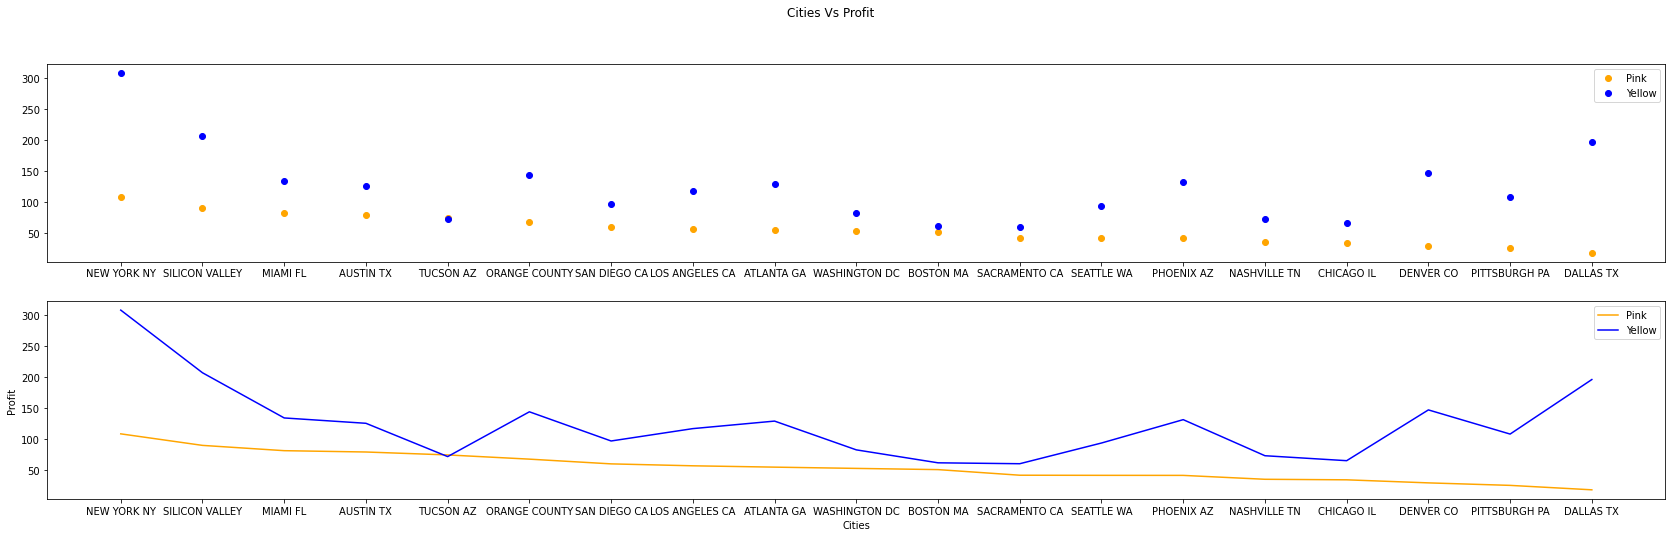

In [18]:
plt.rcParams['axes.facecolor'] = 'white' 


names = PDC['City'][:-1] 
values = PDC['Pink Profit'][:-1]
values2 = PDC['Yellow Profit'][:-1] 
fig, axs = plt.subplots(2, 1, figsize=(29, 8), sharey=True)

axs[0].scatter(names, values, color= 'orange', label= 'Pink') 
axs[1].plot(names, values, color= 'orange', label= 'Pink') 

axs[0].scatter(names, values2, color ='blue', label='Yellow') 
axs[1].plot(names, values2, color ='blue', label='Yellow') 

axs[0].legend(loc="upper right") 
axs[1].legend(loc="upper right") 
plt.xlabel("Cities")
plt.ylabel("Profit")
 
fig.suptitle('Cities Vs Profit')


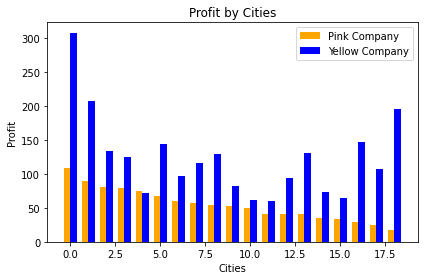

In [19]:
labels = PDC[:-1]['City']
men_means = PDC[:-1]['Pink Profit']
women_means = PDC[:-1]['Yellow Profit']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Pink Company', color = 'orange')
rects2 = ax.bar(x + width/2, women_means, width, label='Yellow Company', color='blue')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Profit')
ax.set_xlabel('Cities')
ax.set_title('Profit by Cities')
#ax.set_xticks(x, labels).empty()
ax.legend()

#ax.bar_label(rects1, padding=3) 
#ax.bar_label(rects2, padding=3) 
plt.xlabel("Cities")

fig.tight_layout() 

plt.show() 

# 
---

### Sex Bias Checked 

Ttest_indResult(statistic=12.701315939501354, pvalue=5.921884821319016e-37)

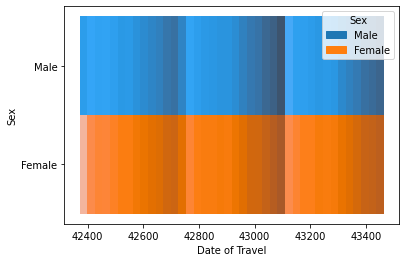

In [20]:
sns.histplot(data=Big_Data, bins= 40,  x="Date of Travel", y='Sex', hue= 'Sex', legend=True, multiple='layer')    
stats.ttest_ind ( Big_Data[ Big_Data['Sex'] == 'Male' ]['Profit'], Big_Data[ Big_Data['Sex'] == 'Female' ]['Profit'] ) 

### Season: Profit vs City 

In [21]:
Q1 = Big_Data[ Big_Data['Date of Travel'] <= 42750 ]  
Q2 = Big_Data[ (Big_Data['Date of Travel'] > 42750) & (Big_Data['Date of Travel'] <= 43110) ] 
Q3 = Big_Data[ Big_Data['Date of Travel'] > 43110 ]   

They are distrubuted in same manner 

<AxesSubplot:xlabel='Date of Travel', ylabel='Count'>

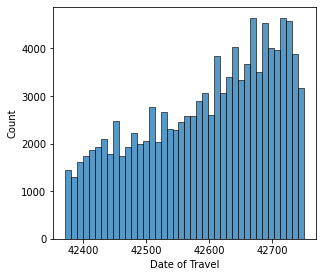

In [22]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 4.7,4.27 

sns.histplot( data=  Q1, bins= 40,  x = "Date of Travel", legend=True, multiple = 'layer' )    

<AxesSubplot:xlabel='Date of Travel', ylabel='Count'>

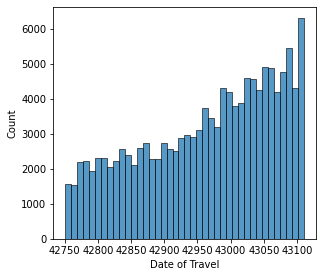

In [23]:
sns.histplot( data=  Q2, bins= 40,  x = "Date of Travel", legend=True, multiple = 'layer' )    

<AxesSubplot:xlabel='Date of Travel', ylabel='Count'>

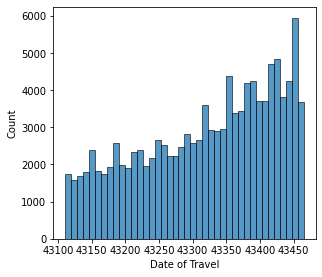

In [24]:
sns.histplot( data=  Q3, bins= 40,  x = "Date of Travel", legend=True, multiple = 'layer' )    

In different seasons, City Profit is compared. 

<AxesSubplot:xlabel='Profit', ylabel='Count'>

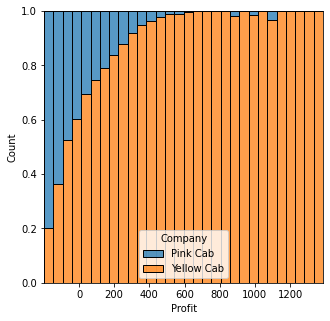

In [25]:
rcParams['figure.figsize'] = 5,5 
sns.histplot( data =  Q1, bins = 30, x = 'Profit', hue='Company',hue_order=['Pink Cab','Yellow Cab'], legend=True, element='bars',stat = "count", multiple='fill' ) 

<AxesSubplot:xlabel='Profit', ylabel='Count'>

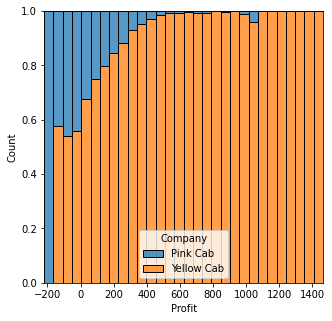

In [26]:
sns.histplot( data =  Q2, bins = 30, x = 'Profit', hue='Company',hue_order=['Pink Cab','Yellow Cab'], legend=True, element='bars',stat = "count", multiple='fill' ) 

<AxesSubplot:xlabel='Profit', ylabel='Count'>

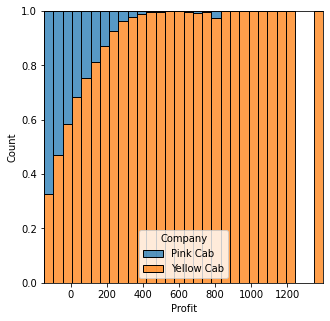

In [27]:
sns.histplot( data =  Q3, bins = 30, x = 'Profit', hue='Company',hue_order=['Pink Cab','Yellow Cab'], legend=True, element='bars',stat = "count", multiple='fill' ) 

# Nice Ones

### Company, Profit, City, Sex 

In [28]:
hoc = PDC['Differences'][:-1].index
hog = ['Male','Female']

hoa = ['18-25','26-40'  ,'41-55','55+'  ] 
Big_Data.loc[ (Big_Data['Age']<=25), "Age Group" ] = hoa[0] 
Big_Data.loc[ (Big_Data['Age']>=26) & (Big_Data['Age']<=40) , "Age Group" ] = hoa[1] 
Big_Data.loc[ (Big_Data['Age']>=41) & (Big_Data['Age']<=55) , "Age Group" ] = hoa[2]
Big_Data.loc[ (Big_Data['Age']> 55), "Age Group" ] = hoa[3]

hokm = ['10 KM','11-20 KM','20-40 KM','41 KM'] 
Big_Data.loc[ (Big_Data['KM Travelled']<=10), "KM Group" ] = hokm[0] 
Big_Data.loc[ (Big_Data['KM Travelled']> 10) & (Big_Data['KM Travelled']<=20) , "KM Group" ] = hokm[1]
Big_Data.loc[ (Big_Data['KM Travelled']> 20) & (Big_Data['KM Travelled']<=40) , "KM Group" ] = hokm[2]
Big_Data.loc[ (Big_Data['KM Travelled']>=41), "KM Group" ] =  hokm[3]

hoi = [ '2k-10k','10k-20k','20k-40k','25k+'] 
Big_Data.loc[ (Big_Data['Income (USD/Month)']<=10000), "Income Level" ] = hoi[0]
Big_Data.loc[ (Big_Data['Income (USD/Month)']> 10000) & (Big_Data['Income (USD/Month)']<=20000) , "Income Level" ] = hoi[1]
Big_Data.loc[ (Big_Data['Income (USD/Month)']> 20000) & (Big_Data['Income (USD/Month)']<=25000) , "Income Level" ] = hoi[2]
Big_Data.loc[ (Big_Data['Income (USD/Month)']>25000), "Income Level" ] = hoi[3]

hod = [ '2016', '2017','2018' ] 
Big_Data.loc[ (Big_Data['Date of Travel']<= 42750)  , "Season" ] = hod[0]
Big_Data.loc[ (Big_Data['Date of Travel']> 42750) & (Big_Data['Date of Travel']<=43110) , "Season" ] = hod[1]
Big_Data.loc[ (Big_Data['Date of Travel']>43110), "Season" ] = hod[2]  

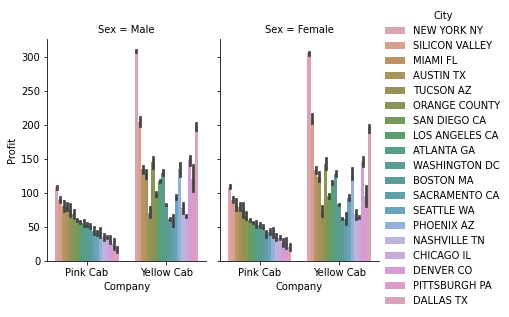

In [29]:
sns.catplot(x="Company", y="Profit",

                hue="City", hue_order = hoc,
                col="Sex",

                data=Big_Data, kind="bar",

                height=4, aspect=.7,saturation=.5 ) 

City & Income Level

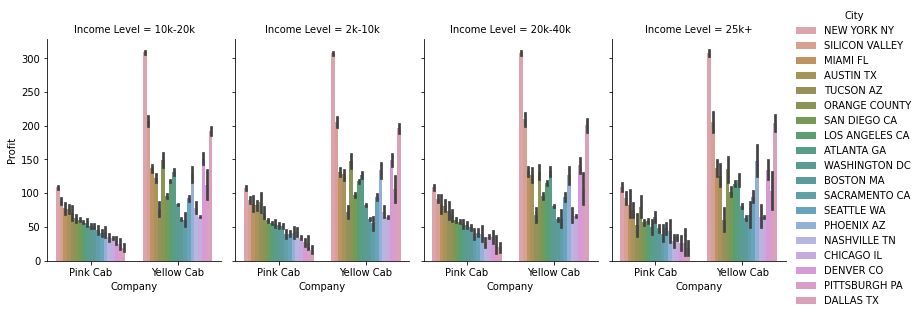

In [30]:
sns.catplot(x="Company", y="Profit",

                hue="City", hue_order = hoc,
                col="Income Level",

                data=Big_Data, kind="bar",

                height=4, aspect=.7,saturation=.5 ) 

Age & Sex

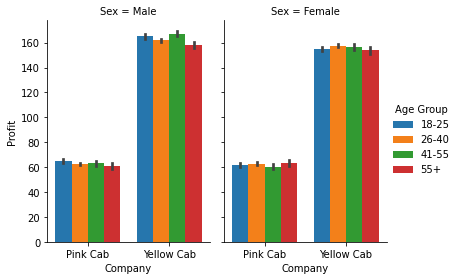

In [31]:
sns.catplot(x="Company", y="Profit",

                hue="Age Group", hue_order =hoa, 
                col="Sex",

                data=Big_Data, kind="bar",

                height=4, aspect=.7,saturation=.9 ) 

KM Traveled & Sex

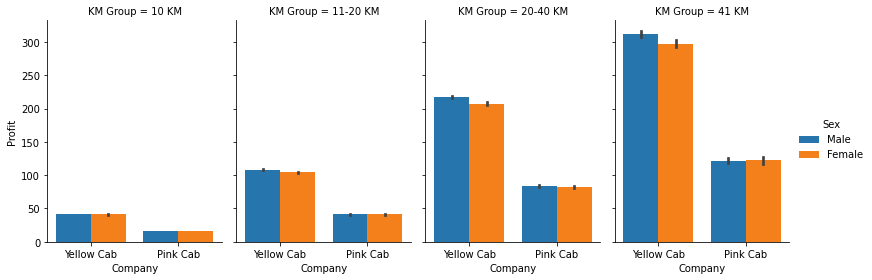

In [32]:
sns.catplot(x="Company", y="Profit",

                hue="Sex", hue_order = hog, 
                col="KM Group",

                data=Big_Data.sort_values('KM Group'), kind="bar",

                height=4, aspect=.7,saturation=.9 ) 

KM Traveled & City 

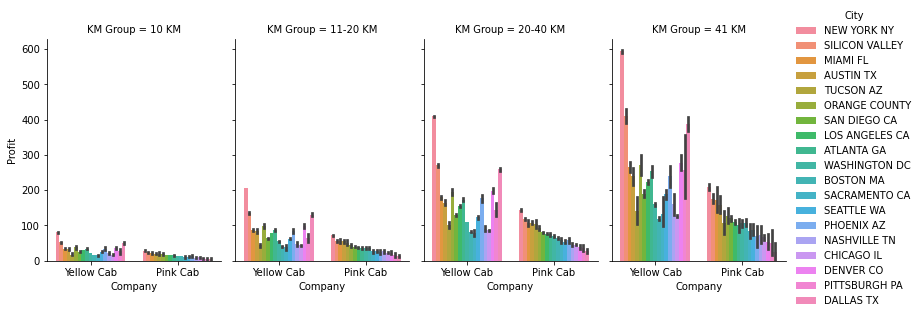

In [33]:
sns.catplot(x="Company", y="Profit",

                hue="City", hue_order = hoc, 
                col="KM Group",

                data=Big_Data.sort_values('KM Group'), kind="bar",

                height=4, aspect=.7,saturation=.9 ) 

Age & KM Traveled

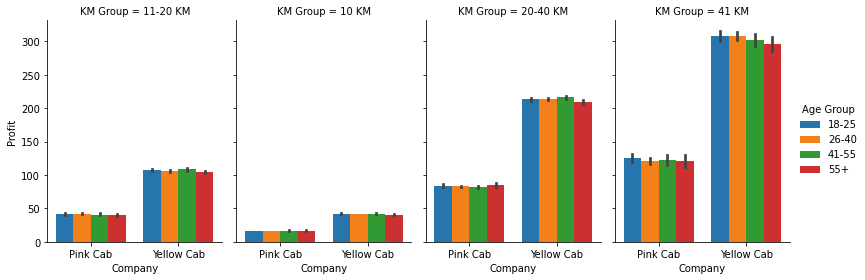

In [34]:
sns.catplot(x="Company", y="Profit",

                hue="Age Group", hue_order = hoa, 
                col="KM Group",

                data=Big_Data.sort_values('Age Group'), kind="bar",

                height=4, aspect=.7,saturation=.9 ) 

Income & Sex

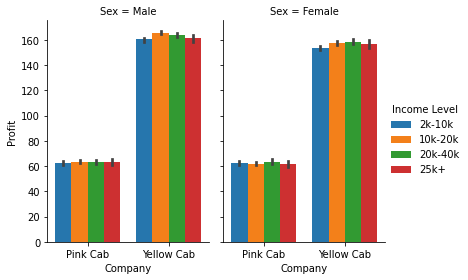

In [35]:
sns.catplot(x="Company", y="Profit",

                hue="Income Level",hue_order = hoi, 
                col="Sex",

                data=Big_Data, kind="bar",

                height=4, aspect=.7,saturation=.9 ) 

Income & Age

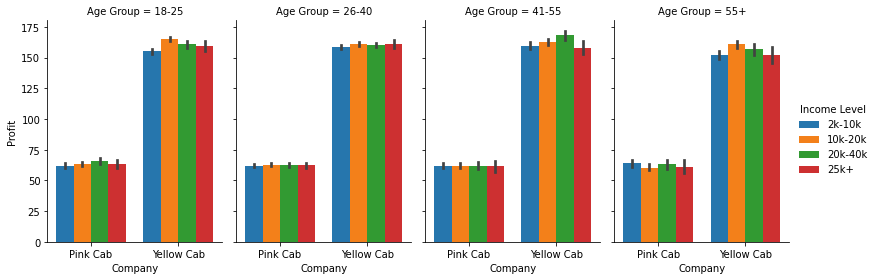

In [36]:
sns.catplot(x="Company", y="Profit",

                hue="Income Level",hue_order = hoi, 
                col="Age Group",

                data=Big_Data.sort_values('Age Group'), kind="bar",

                height=4, aspect=.7,saturation=.9 ) 

Income & City

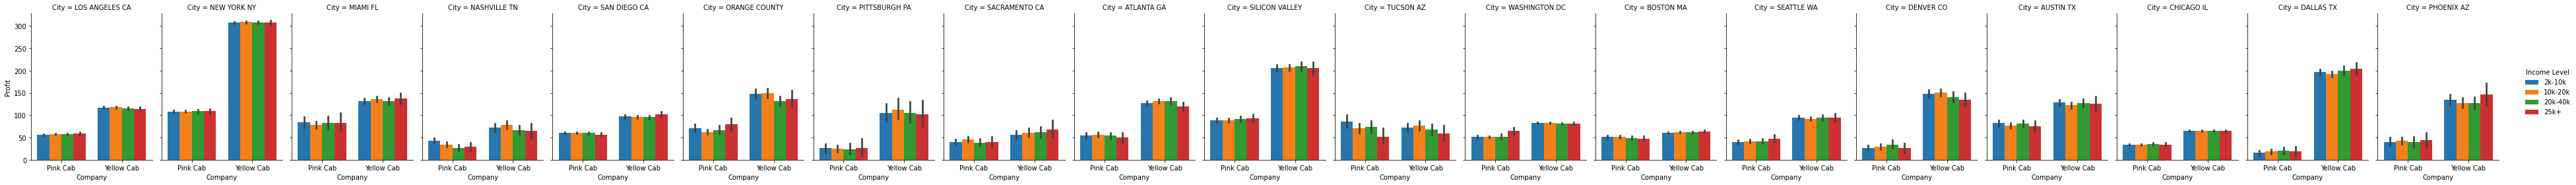

In [37]:
sns.catplot(x="Company", y="Profit",

                hue="Income Level",hue_order = hoi, 
                col="City",

                data=Big_Data.sort_values('Age Group'), kind="bar",

                height=4, aspect=.7,saturation=.9 ) 

Season & City 

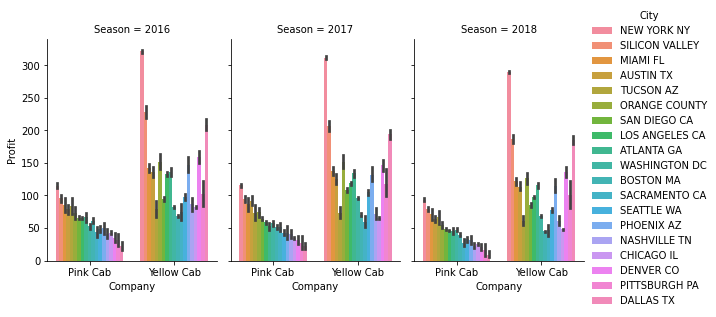

In [38]:
sns.catplot(x="Company", y="Profit",

                hue="City",hue_order = hoc, 
                col="Season",

                data=Big_Data.sort_values('Season'), kind="bar",

                height=4, aspect=.7,saturation=.9 ) 

City & Income 

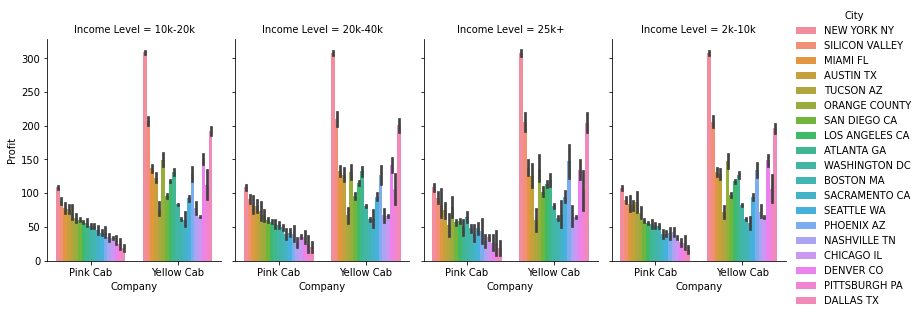

In [39]:
sns.catplot(x="Company", y="Profit",

                hue="City",hue_order = hoc, 
                col="Income Level",

                data=Big_Data.sort_values('Income Level'), kind="bar",

                height=4, aspect=.7,saturation=.9 ) 

## Adding Last Raw Dataset

In [40]:
data4 = pd.read_csv(r'C:\Users\Asus\Desktop\Courses\Codes\Datasets\City.csv') # City 
d_2 =[] 
d_3 =[] 
kjl = [1,2] 
for j in kjl:
    for k in data4.iloc[:,j]   :  
        if j == 1: 
            k = k.replace(',','') 
            k = k.replace(' ','')
            d_2.append(int(k)) 
        elif j == 2:
            k = k.replace(',','') 
            k = k.replace(' ','')
            d_3.append(int(k)) 
data4.iloc[:,1] = d_2 
data4.iloc[:,2] = d_3              

In [41]:
temp = pd.concat( (PD['Net Balances'], YD['Net Balances']), axis=1)  
temp['City'] = temp.index 
temp = pd.merge(data4,temp,  on ='City' ) 

In [42]:
import collections 
CD = dict(collections.Counter(Big_Data['City'])) 
PCD = pd.DataFrame.from_dict(orient='index', data= CD)

PCD['City'] = PCD.index 


In [43]:
temp = pd.merge(temp, PCD, on ='City' )  

In [44]:
temp['Profit'] = temp.iloc[:,4] - temp.iloc[:,3] 
temp['Pop Over Users'] = temp.iloc[:,1] / temp.iloc[:,2] 
temp['Pop_User_Counts'] = temp.iloc[:,-3] / temp.iloc[:,-1] 
final = temp  

In [45]:
te = list( final.columns[:3] ) 
te.append('Pink')  
te.append('Yellow')
te.append('Count')

for i in list(final.columns[6:]):
    te.append(i)
te
final.columns = te 

In [46]:
final.head() 

,City,Population,Users,Pink,Yellow,Count,Profit,Pop Over Users,Pop_User_Counts
0,NEW YORK NY,8405837,302149,108.217540,307.864252,99885,199.646711,27.820172,3590.380454
1,CHICAGO IL,1955130,164468,34.047910,64.924486,56625,30.876576,11.887601,4763.366375
2,LOS ANGELES CA,1595037,144132,56.669120,116.656368,48033,59.987248,11.066502,4340.396089
3,MIAMI FL,1339155,17675,81.069526,133.872429,6454,52.802903,75.765488,85.183903
4,SILICON VALLEY,1177609,27247,89.610358,206.788383,8519,117.178024,43.219767,197.108882


(array([13.,  1.,  1.,  0.,  2.,  1.,  0.,  0.,  0.,  1.]),
 array([ 1313. , 11170.2, 21027.4, 30884.6, 40741.8, 50599. , 60456.2,
        70313.4, 80170.6, 90027.8, 99885. ]),
 <BarContainer object of 10 artists>)

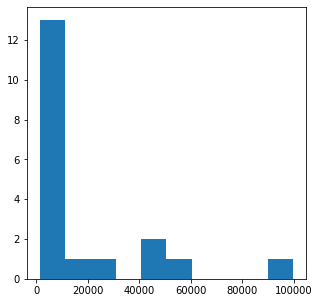

In [47]:
plt.hist(final['Count'])

In [48]:
hop = ['0-40','40-80'  ,'80-120','120+'  ] 
final.loc[ (final['Pop Over Users']<=40), "POU Group" ] = hop[0] 
final.loc[ (final['Pop Over Users']> 40) & (final['Pop Over Users']<=80) , "POU Group" ] = hop[1] 
final.loc[ (final['Pop Over Users']> 80) & (final['Pop Over Users']<120) , "POU Group" ] = hop[2]
final.loc[ (final['Pop Over Users']>= 120), "POU Group" ] = hop[3]

In [49]:
hocount = ['0-20k','20k-40k'  ,'40k-80k','80k+'  ] 
final.loc[ (final['Count']<=20000), "Count Group" ] = hocount[0] 
final.loc[ (final['Count']> 20000) & (final['Count']<=40000) , "Count Group" ] = hocount[1] 
final.loc[ (final['Count']> 40000) & (final['Count']<80000) , "Count Group" ] = hocount[2]
final.loc[ (final['Count']>= 80000), "Count Group" ] = hocount[3] 

In [55]:
final.head() 

,City,Population,Users,Pink,Yellow,Count,Profit,Pop Over Users,Pop_User_Counts,POU Group,Count Group
0,NEW YORK NY,8405837,302149,108.217540,307.864252,99885,199.646711,27.820172,3590.380454,0-40,80k+
1,CHICAGO IL,1955130,164468,34.047910,64.924486,56625,30.876576,11.887601,4763.366375,0-40,40k-80k
2,LOS ANGELES CA,1595037,144132,56.669120,116.656368,48033,59.987248,11.066502,4340.396089,0-40,40k-80k
3,MIAMI FL,1339155,17675,81.069526,133.872429,6454,52.802903,75.765488,85.183903,40-80,0-20k
4,SILICON VALLEY,1177609,27247,89.610358,206.788383,8519,117.178024,43.219767,197.108882,40-80,0-20k


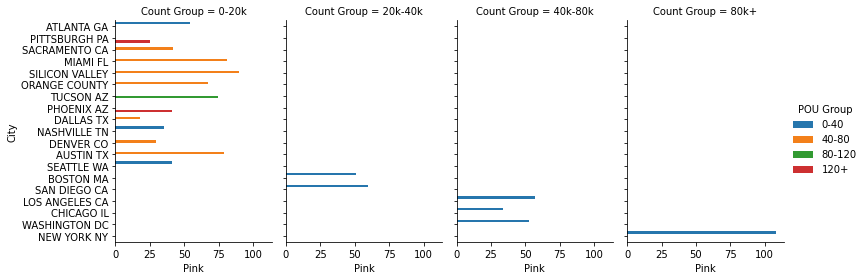

In [60]:
sns.catplot(x="Pink", y="City",

                hue="POU Group",hue_order = hop, 
                col="Count Group",

                data=final.sort_values('Count Group'), kind="bar",

                height=4, aspect=.7,saturation=.9 ) 

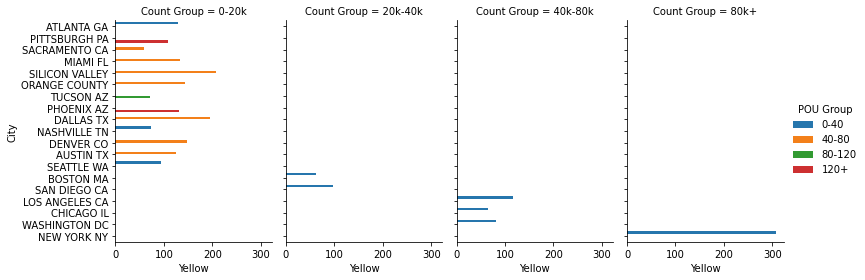

In [61]:
sns.catplot(x="Yellow", y="City",

                hue="POU Group",hue_order = hop, 
                col="Count Group",

                data=final.sort_values('Count Group'), kind="bar",

                height=4, aspect=.7,saturation=.9 ) 